In [83]:
!pip freeze
!pip3 install numpy
!pip3 install pandas
!pip3 install sklearn
!pip3 install matplotlib
!pip3 install pydotplus
!pip3 install six


absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
asgiref==3.3.1
astor==0.8.1
astropy==4.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.1.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.4
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.5
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.21
daft==0.0.4
dask==2.12.0
dataclasses==0.8
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
Django==3.1.6
dlib==19.18.0
dm-tree==0.1.5
docopt

In [84]:
# read csv file
import pandas as pd
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('cleaned_processed.cleveland.data', header = None)
df.head()

Saving cleaned_processed.cleveland.data to cleaned_processed.cleveland (7).data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Best hyperparameter for this case: {'criterion': 'gini', 'max_depth': 3}
---------------------------
Model A via Gini
Accuracy of this decision tree is 0.83333
---------------------------


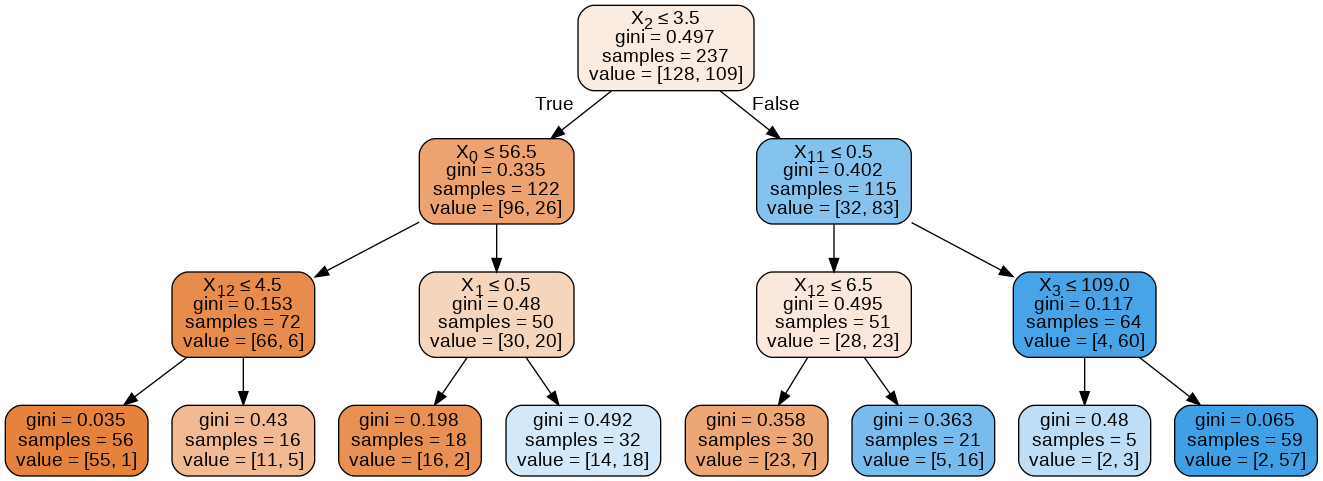

In [85]:
# Decision Tree
x = df.drop(df.columns[[13]],axis=1)
y  = df[df.columns[[13]]]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# use Grid Search Cross Validation (GridSearchCV) from 
# scikit to look for the best hyperparameter 

from sklearn.model_selection import GridSearchCV
from sklearn import tree 
import numpy as np

def dtree_grid_search(data, target, nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(2, 10)}
    d_tree= tree.DecisionTreeClassifier()
    
    gridsearch = GridSearchCV(d_tree, param_grid, cv=nfolds)
    gridsearch.fit(data, target)
    return gridsearch.best_params_
print("Best hyperparameter for this case:",dtree_grid_search(x, y, 5))



# Decision Trees
decision_tree_entropy = tree.DecisionTreeClassifier(random_state=0, max_depth=3,criterion="gini")
decision_tree_entropy.fit(x_train,y_train)

y_predict = decision_tree_entropy.predict(x_test)

accuracy = decision_tree_entropy.score(x_test,y_test)

print('---------------------------')
print('Model A via Gini')
print('Accuracy of this decision tree is %.5f' %(accuracy))
print('---------------------------')

from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image  
# https://pydotplus.readthedocs.io/ for generating generates a GraphViz representation of the decision tree.
import pydotplus 

dot_data = StringIO()
export_graphviz(decision_tree_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
# Random Forest
# import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)

print('---------------------------')
print('Model B via Random Forest')
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 3
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 50
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 70
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 90
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 100
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))


size = 90
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 70
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 50
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 20
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

size = 3
model = RandomForestClassifier(n_estimators=size)
model.fit(x_train,y_train)
accuracy = model.score(x_test,y_test)
print('Accuracy of this decision tree with size %d is %.5f' %(size, accuracy))

print('---------------------------')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: DataConversi

---------------------------
Model B via Random Forest
Accuracy of this decision tree with size 20 is 0.78333
Accuracy of this decision tree with size 3 is 0.78333
Accuracy of this decision tree with size 20 is 0.83333
Accuracy of this decision tree with size 50 is 0.90000
Accuracy of this decision tree with size 70 is 0.86667
Accuracy of this decision tree with size 90 is 0.91667


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy of this decision tree with size 100 is 0.90000
Accuracy of this decision tree with size 90 is 0.88333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy of this decision tree with size 70 is 0.90000
Accuracy of this decision tree with size 50 is 0.86667
Accuracy of this decision tree with size 20 is 0.86667
Accuracy of this decision tree with size 3 is 0.75000
---------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [87]:
# Neural Network
# Solver: sgd

from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


size = 3
mlp1 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp1.fit(x_train, y_train);
print('---------------------------')
print('Model C is via Neural Network')
print('The accuracy for Neural Network with %d Neurons is %.5f '%(size,mlp1.score(x_train, y_train)))

size = 7
mlp2 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp2.fit(x_train, y_train);
print('The accuracy for Neural Network with %d Neurons is %.5f '%(size,mlp2.score(x_train, y_train)))

size = 13
mlp3 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp3.fit(x_train, y_train);
print('The accuracy for Neural Network with %d Neurons is %.5f '%(size,mlp3.score(x_train, y_train)))

size = 21
mlp4 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp4.fit(x_train, y_train);
print('The accuracy for Neural Network with %d Neurons is %.5f '%(size,mlp4.score(x_train, y_train)))
print('---------------------------')

size = 3
mlp4_2 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp4_2.fit(x_train, y_train);
print('The accuracy of using alpha=0.1 is %.5f '%(mlp4_2.score(x_train, y_train)))

size = 3
mlp5 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.1,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp5.fit(x_train, y_train);
print('The accuracy of using alpha=0.1 is %.5f '%(mlp5.score(x_train, y_train)))

size = 3
mlp6 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.01,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp6.fit(x_train, y_train);
print('The accuracy of using alpha=0.01 is %.5f '%(mlp6.score(x_train, y_train)))

size = 3
mlp7 = MLPClassifier(hidden_layer_sizes=(size), max_iter=2000, alpha=0.001,
                    solver='sgd',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp7.fit(x_train, y_train);
print('The accuracy of using alpha=0.001 is %.5f '%(mlp7.score(x_train, y_train)))


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---------------------------
Model C is via Neural Network
The accuracy for Neural Network with 3 Neurons is 0.54008 
The accuracy for Neural Network with 7 Neurons is 0.46414 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for Neural Network with 13 Neurons is 0.72996 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for Neural Network with 21 Neurons is 0.73418 
---------------------------
The accuracy of using alpha=0.1 is 0.45992 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of using alpha=0.1 is 0.54008 
The accuracy of using alpha=0.01 is 0.54008 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of using alpha=0.001 is 0.54008 


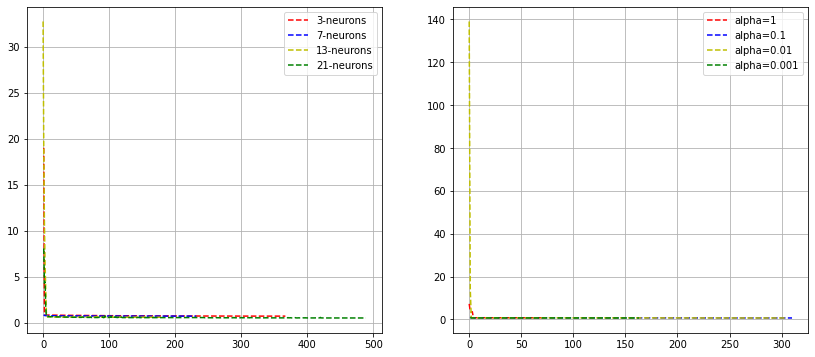

In [91]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].plot(mlp1.loss_curve_,'r--', label='3-neurons')
axs[0].plot(mlp2.loss_curve_,'b--',label='7-neurons')
axs[0].plot(mlp3.loss_curve_,'y--',label='13-neurons')
axs[0].plot(mlp4.loss_curve_,'g--',label='21-neurons')
axs[0].grid('True')
axs[0].legend()

axs[1].plot(mlp4_2.loss_curve_, 'r--' , label='alpha=1')
axs[1].plot(mlp5.loss_curve_, 'b--' , label='alpha=0.1')
axs[1].plot(mlp6.loss_curve_, 'y--' , label='alpha=0.01')
axs[1].plot(mlp7.loss_curve_, 'g--' , label='alpha=0.001')

axs[1].grid('True')
axs[1].legend()